In [38]:
# Converting lat/long to cartesian
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


def round_to_significant(value, num_significant):
    if value == 0:
        return 0
    return round(value, -int(np.floor(np.log10(abs(value)))) + (num_significant - 1))


def get_cartesian(lat=None,lon=None):
    lat, lon = np.deg2rad(lat), np.deg2rad(lon)
    R = 6371 # radius of the earth
    x = round_to_significant(R * np.cos(lat) * np.cos(lon)/100 +60,5) 
    y = round_to_significant(R * np.cos(lat) * np.sin(lon)/100 +60,5)
    z = round_to_significant(R *np.sin(lat)/100 + 60,5)

    return x,y,z


lat_column = []
lon_column = []

with open('American_capitals_mod.dat', 'r') as file:
    for line in file:
        columns = line.split()
        
        if len(columns) >= 2:  # Ensures there are at least four columns
            first_value = columns[0].strip()
            second_value = columns[1].strip()

            if first_value and second_value:  # Skips empty strings
                lon_column.append(float(first_value))
                lat_column.append(float(second_value))

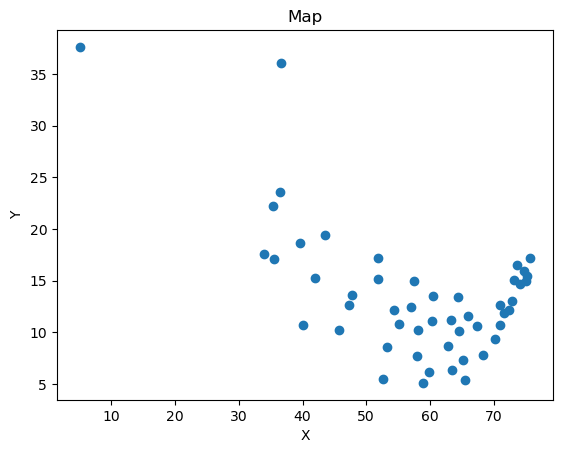

In [39]:
# Convert lat/lon coordinates to Cartesian coordinates
cartesian_coordinates = [get_cartesian(lat, lon) for lat, lon in zip(lat_column, lon_column)]
x_coords, y_coords, _ = zip(*cartesian_coordinates)

# Plot the Cartesian coordinates as a 2D scatter plot
plt.scatter(x_coords, y_coords)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Map')
plt.show()


In [40]:
with open("list.txt", "w") as file:
    for x, y in zip(x_coords, y_coords):
        file.write(f"{x} {y}\n")

In [41]:
x_column = []
y_column = []
with open('list.txt', 'r') as file:
    for line in file:
        columns = line.split()
        
        if len(columns) >= 2:  # Ensures there are at least four columns
            first_value = columns[0].strip()
            second_value = columns[1].strip()

            if first_value and second_value:  # Skips empty strings
                x_column.append(float(first_value))
                y_column.append(float(second_value))

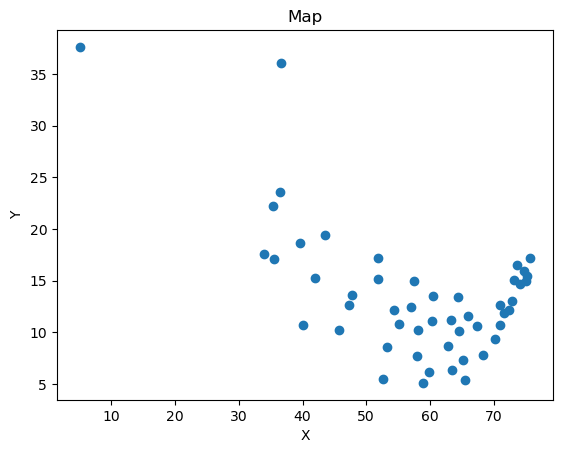

In [42]:
# Plot the Cartesian coordinates as a 2D scatter plot
plt.scatter(x_column, y_column)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Map')
plt.show()